# DEVELOP AN AI MODEL TO REDUCE HIRING AND TRAINING COST OF EMPLOYEES BY PREDICTING EMPLOYEE ATTRITION

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

![alt text](https://drive.google.com/uc?id=1Mk2H7VYfv6ijUS9XqEdBQV6_LaHiyvkJ)

# Objectives



1.   Uncover the factors that contribute to employer attrition rate
2.   Provide reccommendations on areas to invest to decrease the rate of attrition
3.  Create a Model to predict the probality of employer leaving the company








In [ ]:
#Males tend to have a little higher attrition rate than females.


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline 
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You have to include the full link to the csv file containing your dataset
employee_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Human_Resources.csv")

In [ ]:
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [ ]:
employee_df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**### EXPLAINING THE VARIOUS COLUMNS**
*   Age
*   Attrition 
*   BusinessTravel
*   DailyRate
*   Department 
*   DistanceFromHome

*   Education: 
1 ‘Below College’ 2 ‘College’ 3 ‘Bachelor’ 4 ‘Master’ 5 ‘Doctor’

*   EducationField
*   EmployeeCount
*   EmployeeNumber

*   EnvironmentSatisfaction: 
1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’

*   Gender
*   HourlyRate

*   JobInvolvement: 
1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’

*   JobLevel

*   JobSatisfaction: 
1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’

*   MaritalStatus
*   MonthlyIncome
*   MonthlyRate
*   NumCompaniesWorked
*   Over18
*   OverTime
*   PercentSalaryHike

*   PerformanceRating
1 ‘Low’ 2 ‘Good’ 3 ‘Excellent’ 4 ‘Outstanding’

*   RelationshipSatisfaction: 
1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’

*   StandardHours: 
*   StockOptionLevel: 
*   TotalWorkingYears: 
*   TrainingTimesLastYear: 

*   WorkLifeBalance: 
1 ‘Bad’ 2 ‘Good’ 3 ‘Better’ 4 ‘Best’

*   YearsAtCompany: 
*   YearsInCurrentRole: 
*   YearsSinceLastPromotion: 
*   YearsWithCurrManager: 

In [ ]:
#obtain summary statistics about the dataset 

employee_df.describe().T

#Note: Mean age is approx. 39 years old 

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [ ]:
#Check if there are any Null values in the dataset 
employee_df.isna().sum()

#As can be observed there are no Null values in the dataset 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#find duplicates 

employee_df[employee_df.duplicated()].sum()

#Data is clean. There are no duplicates in the dataset. 

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [ ]:
# 35 features in total, each contains 1470 data points

# 3: QUERY AND VISUALIZE DATASET

In [ ]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations 

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)


employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)


employee_df['Over18'] = employee_df['Over18'].apply(lambda x:1 if x == 'Y' else 0)


In [ ]:
employee_df.head()

In [ ]:
employee_df["Gender"].value_counts(normalize=True)*100

Male      60.0
Female    40.0
Name: Gender, dtype: float64

Text(0, 0.5, 'Count')

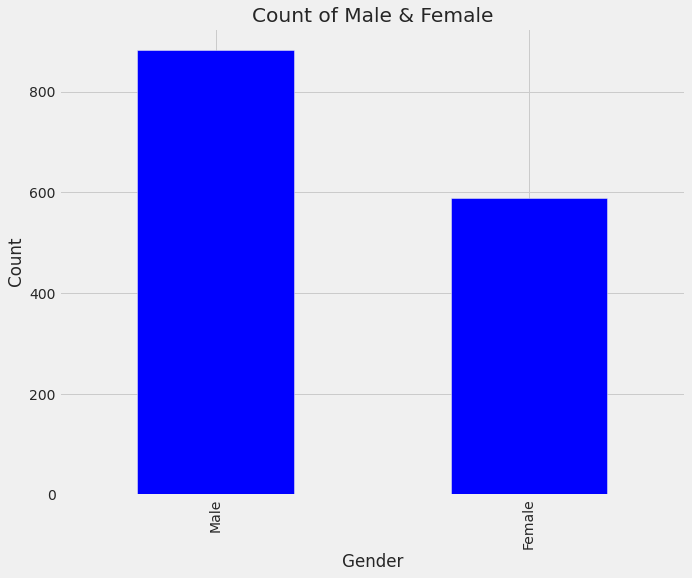

In [ ]:
plt.subplots(figsize = (10,8))
employee_df["Gender"].value_counts().plot.bar(color = 'blue')

plt.title("Count of Male & Female")
plt.xlabel("Gender")
plt.ylabel("Count")

In [ ]:
employee_df["Education"].value_counts(normalize=True)*100

3    38.911565
4    27.074830
2    19.183673
1    11.564626
5     3.265306
Name: Education, dtype: float64

Text(0, 0.5, 'Count')

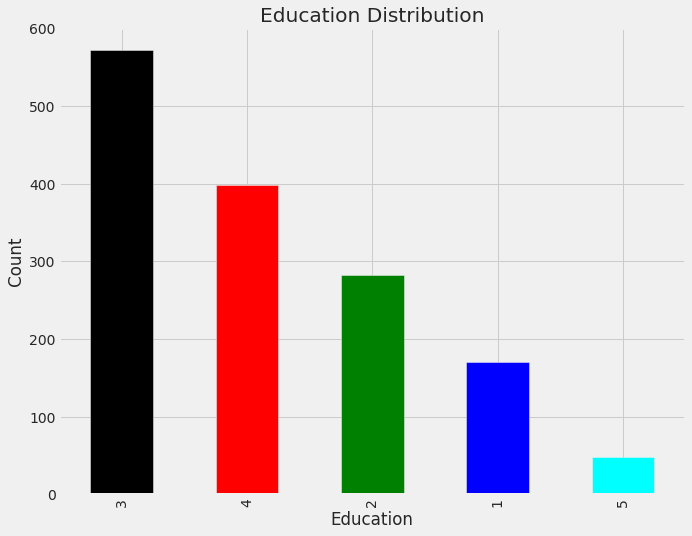

In [ ]:
plt.subplots(figsize = (10,8))
employee_df["Education"].value_counts(normalize=True)
employee_df["Education"].value_counts().plot.bar(color = ['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Education Distribution")
plt.xlabel("Education")
plt.ylabel("Count")

In [ ]:
employee_df["JobRole"].value_counts(normalize=True)*100

Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: JobRole, dtype: float64

Text(0, 0.5, 'Count')

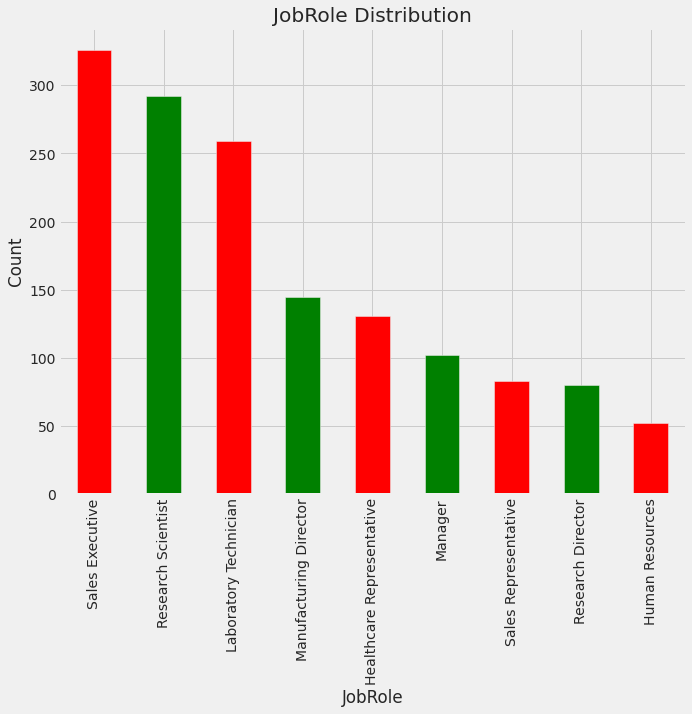

In [ ]:
plt.subplots(figsize = (10,8))
employee_df["JobRole"].value_counts(normalize=True)
employee_df["JobRole"].value_counts().plot.bar(color = ['red', 'green'])
plt.title("JobRole Distribution")
plt.xlabel("JobRole")
plt.ylabel("Count")

In [ ]:
employee_df["BusinessTravel"].value_counts(normalize=True)*100

Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64

Text(0, 0.5, 'Count')

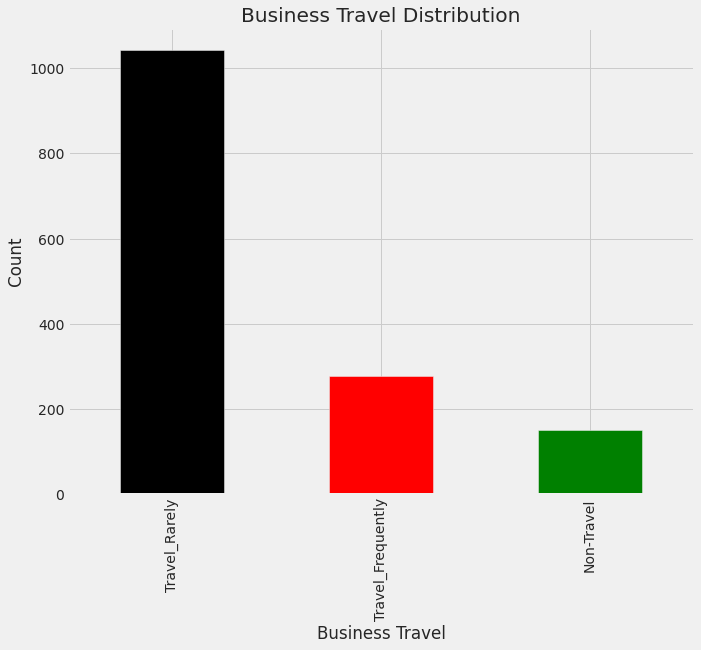

In [ ]:
plt.subplots(figsize = (10,8))
employee_df["BusinessTravel"].value_counts(normalize=True)
employee_df["BusinessTravel"].value_counts().plot.bar(color = ['black', 'red', 'green'])
plt.title("Business Travel Distribution")
plt.xlabel("Business Travel")
plt.ylabel("Count")

In [ ]:
employee_df.groupby(['BusinessTravel'])['JobRole'].value_counts(normalize=True)*100

BusinessTravel     JobRole                  
Non-Travel         Sales Executive              26.000000
                   Laboratory Technician        18.666667
                   Research Scientist           18.666667
                   Healthcare Representative    10.000000
                   Manufacturing Director        8.666667
                   Manager                       8.000000
                   Research Director             4.000000
                   Sales Representative          3.333333
                   Human Resources               2.666667
Travel_Frequently  Sales Executive              21.299639
                   Research Scientist           19.494585
                   Laboratory Technician        18.411552
                   Manufacturing Director       10.469314
                   Healthcare Representative     9.386282
                   Sales Representative          8.303249
                   Manager                       4.693141
                   Research

In [ ]:
employee_df.groupby(['JobRole'])['DailyRate'].mean().sort_values(ascending=False)

JobRole
Healthcare Representative    854.251908
Sales Representative         811.349398
Research Director            802.450000
Sales Executive              802.098160
Research Scientist           800.359589
Laboratory Technician        796.617761
Manufacturing Director       796.020690
Manager                      782.950980
Human Resources              757.923077
Name: DailyRate, dtype: float64

In [ ]:
#Checking the salary of both genders to determine if theres any salary discrimination by gender 
employee_df.groupby(['Gender'])['MonthlyIncome'].agg(["mean", "max"]) 

mean    max
Gender                    
Female  6686.566327  19973
Male    6380.507937  19999

In [ ]:
employee_df.groupby(['Gender'])['HourlyRate'].agg(["mean", "max"]) 

mean  max
Gender                
Female  65.903061  100
Male    65.883220  100

In [ ]:
employee_df.groupby(['Gender'])['PercentSalaryHike'].mean()

#PercentSalaryHike


Gender
Female    15.197279
Male      15.217687
Name: PercentSalaryHike, dtype: float64

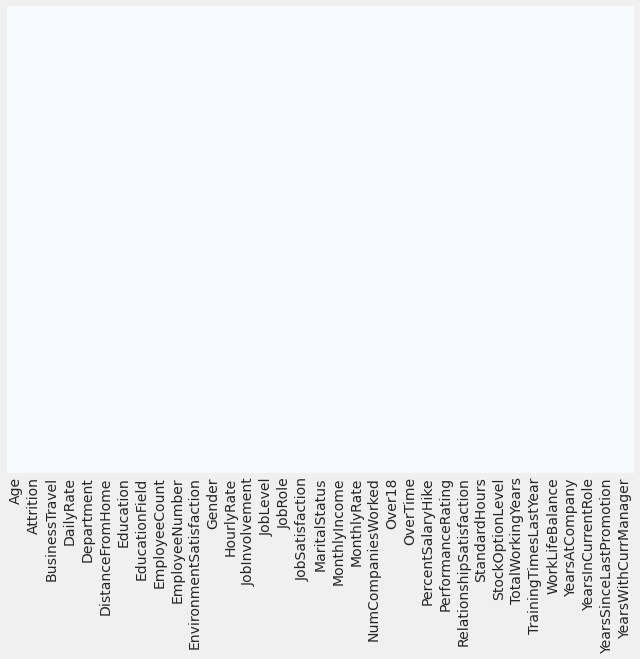

In [ ]:
# Let's see if we have any missing data, luckily we don't!
plt.subplots(figsize = (10,8))
sns.heatmap(employee_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ad9d7a040>,
      dtype=object)

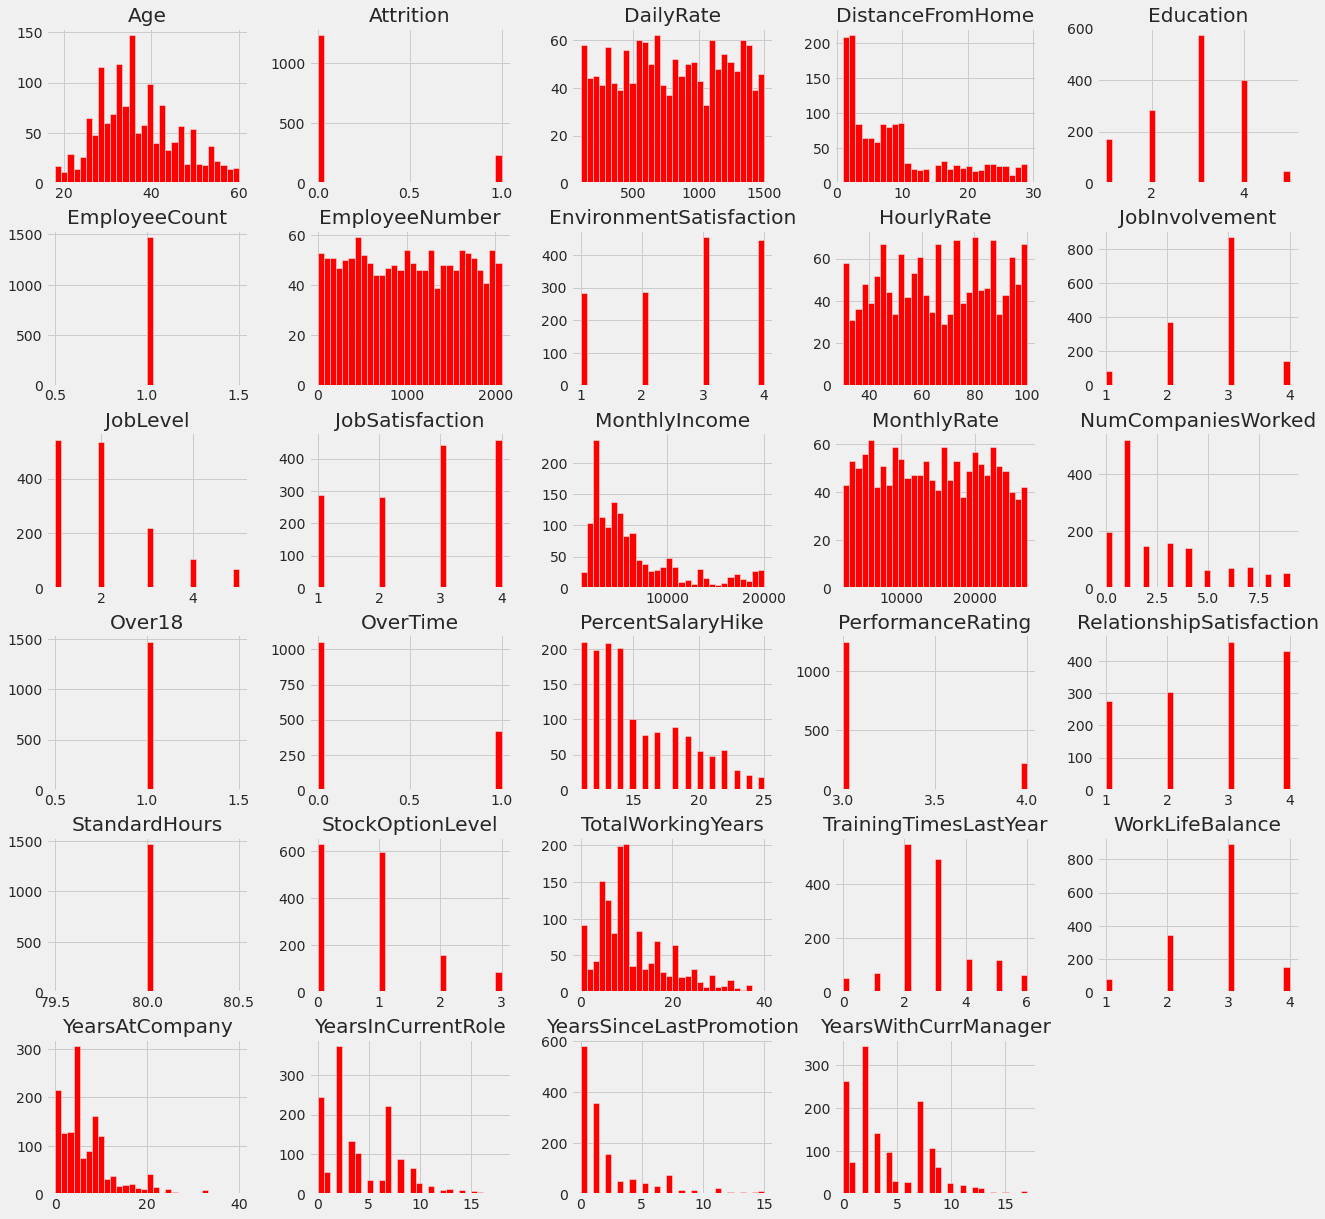

In [ ]:
#Plot histogram of dataset 

employee_df.hist(bins = 30, figsize = (20,20), color = 'r')

# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy

# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

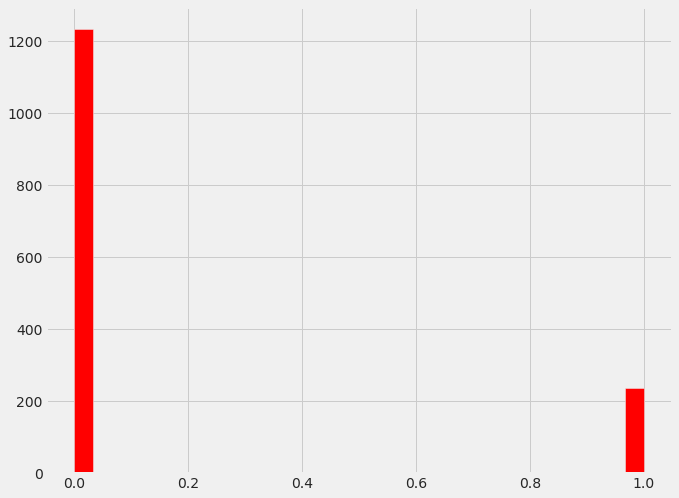

In [ ]:
plt.subplots(figsize = (10,8))
employee_df['Attrition'].hist(bins = 30, color = 'r')

In [ ]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well

employee_df.drop(['StandardHours', 'EmployeeCount', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)


In [ ]:
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   
3                   1         1                 11                  3   
4                   9         0                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [ ]:
# Let's see how many employees left the company! 
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [ ]:
# Count the number of employees who stayed and left

print('Total number of worker: ', len(employee_df))
print()
print('Total number of workers who left: ', len(left_df))
print()
print('% of workers who left : ', (len(left_df))/len(employee_df)*100)
print()
print('Total number of workers who stayed : ', len(stayed_df))
print()
print('% of workers who stayed : ', (len(stayed_df))/len(employee_df)*100)


Total number of worker:  1470

Total number of workers who left:  237

% of workers who left :  16.122448979591837

Total number of workers who stayed :  1233

% of workers who stayed :  83.87755102040816


It seems that we are dealing with an imbalanced dataset 

In [ ]:
left_df.describe().T

count          mean          std     min     25%  \
Age                       237.0     33.607595     9.689350    18.0    28.0   
Attrition                 237.0      1.000000     0.000000     1.0     1.0   
DailyRate                 237.0    750.362869   401.899519   103.0   408.0   
DistanceFromHome          237.0     10.632911     8.452525     1.0     3.0   
Education                 237.0      2.839662     1.008244     1.0     2.0   
EnvironmentSatisfaction   237.0      2.464135     1.169791     1.0     1.0   
HourlyRate                237.0     65.573840    20.099958    31.0    50.0   
JobInvolvement            237.0      2.518987     0.773405     1.0     2.0   
JobLevel                  237.0      1.637131     0.940594     1.0     1.0   
JobSatisfaction           237.0      2.468354     1.118058     1.0     1.0   
MonthlyIncome             237.0   4787.092827  3640.210367  1009.0  2373.0   
MonthlyRate               237.0  14559.308017  7208.153264  2326.0  8870.0   
NumCompaniesWorked        237.0      2.940928     2.678519     0.0     1.0   
OverTime                  237.0      0.535865     0.499768     0.0     0.0   
PercentSalaryHike         237.0     15.097046     3.770294    11.0    12.0   
PerformanceRating         237.0      3.156118     0.363735     3.0     3.0   
RelationshipSatisfaction  237.0      2.599156     1.125437     1.0     2.0   
StockOptionLevel          237.0      0.527426     0.856361     0.0     0.0   
TotalWorkingYears         237.0      8.244726     7.169204     0.0     3.0   
TrainingTimesLastYear     237.0      2.624473     1.254784     0.0     2.0   
WorkLifeBalance           237.0      2.658228     0.816453     1.0     2.0   
YearsAtCompany            237.0      5.130802     5.949984     0.0     1.0   
YearsInCurrentRole        237.0      2.902954     3.174827     0.0     0.0   
YearsSinceLastPromotion   237.0      1.945148     3.153077     0.0     0.0   
YearsWithCurrManager      237.0      2.852321     3.143349     0.0     0.0   

                              50%      75%      max  
Age                          32.0     39.0     58.0  
Attrition                     1.0      1.0      1.0  
DailyRate                   699.0   1092.0   1496.0  
DistanceFromHome              9.0     17.0     29.0  
Education                     3.0      4.0      5.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   66.0     84.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      1.0      2.0      5.0  
JobSatisfaction               3.0      3.0      4.0  
MonthlyIncome              3202.0   5916.0  19859.0  
MonthlyRate               14618.0  21081.0  26999.0  
NumCompaniesWorked            1.0      5.0      9.0  
OverTime                      1.0      1.0      1.0  
PercentSalaryHike            14.0     17.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StockOptionLevel              0.0      1.0      3.0  
TotalWorkingYears             7.0     10.0     40.0  
TrainingTimesLastYear         2.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                3.0      7.0     40.0  
YearsInCurrentRole            2.0      4.0     15.0  
YearsSinceLastPromotion       1.0      2.0     15.0  
YearsWithCurrManager          2.0      5.0     14.0

In [ ]:
stayed_df.describe().T

count          mean          std     min     25%  \
Age                       1233.0     37.561233     8.888360    18.0    31.0   
Attrition                 1233.0      0.000000     0.000000     0.0     0.0   
DailyRate                 1233.0    812.504461   403.208379   102.0   477.0   
DistanceFromHome          1233.0      8.915653     8.012633     1.0     2.0   
Education                 1233.0      2.927007     1.027002     1.0     2.0   
EnvironmentSatisfaction   1233.0      2.771290     1.071132     1.0     2.0   
HourlyRate                1233.0     65.952149    20.380754    30.0    48.0   
JobInvolvement            1233.0      2.770479     0.692050     1.0     2.0   
JobLevel                  1233.0      2.145985     1.117933     1.0     1.0   
JobSatisfaction           1233.0      2.778589     1.093277     1.0     2.0   
MonthlyIncome             1233.0   6832.739659  4818.208001  1051.0  3211.0   
MonthlyRate               1233.0  14265.779400  7102.260749  2094.0  7973.0   
NumCompaniesWorked        1233.0      2.645580     2.460090     0.0     1.0   
OverTime                  1233.0      0.234388     0.423787     0.0     0.0   
PercentSalaryHike         1233.0     15.231144     3.639511    11.0    12.0   
PerformanceRating         1233.0      3.153285     0.360408     3.0     3.0   
RelationshipSatisfaction  1233.0      2.733982     1.071603     1.0     2.0   
StockOptionLevel          1233.0      0.845093     0.841985     0.0     0.0   
TotalWorkingYears         1233.0     11.862936     7.760719     0.0     6.0   
TrainingTimesLastYear     1233.0      2.832928     1.293585     0.0     2.0   
WorkLifeBalance           1233.0      2.781022     0.681907     1.0     2.0   
YearsAtCompany            1233.0      7.369019     6.096298     0.0     3.0   
YearsInCurrentRole        1233.0      4.484185     3.649402     0.0     2.0   
YearsSinceLastPromotion   1233.0      2.234388     3.234762     0.0     0.0   
YearsWithCurrManager      1233.0      4.367397     3.594116     0.0     2.0   

                              50%      75%      max  
Age                          36.0     43.0     60.0  
Attrition                     0.0      0.0      0.0  
DailyRate                   817.0   1176.0   1499.0  
DistanceFromHome              7.0     13.0     29.0  
Education                     3.0      4.0      5.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   66.0     83.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      2.0      3.0      5.0  
JobSatisfaction               3.0      4.0      4.0  
MonthlyIncome              5204.0   8834.0  19999.0  
MonthlyRate               14120.0  20364.0  26997.0  
NumCompaniesWorked            2.0      4.0      9.0  
OverTime                      0.0      0.0      1.0  
PercentSalaryHike            14.0     18.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StockOptionLevel              1.0      1.0      3.0  
TotalWorkingYears            10.0     16.0     38.0  
TrainingTimesLastYear         3.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                6.0     10.0     37.0  
YearsInCurrentRole            3.0      7.0     18.0  
YearsSinceLastPromotion       1.0      3.0     15.0  
YearsWithCurrManager          3.0      7.0     17.0

In [ ]:
#  Let's compare the mean and std of the employees who stayed and left 

# 1st Observation: 'age': mean age of the employees who stayed is higher compared to who left

# 2nd Observation:'DailyRate': Daily Rate of employees who stayed is higher than those who left. 

# 3rd Observation: 'DistanceFromHome': Employees who stayed live closer to home than those who left. 

# 4th Observation: 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs tend to stay 

# 5th Observation: 'StockOptionLevel': Employees who stayed tend to have higher stock option level. 


#### Correlation Inspection

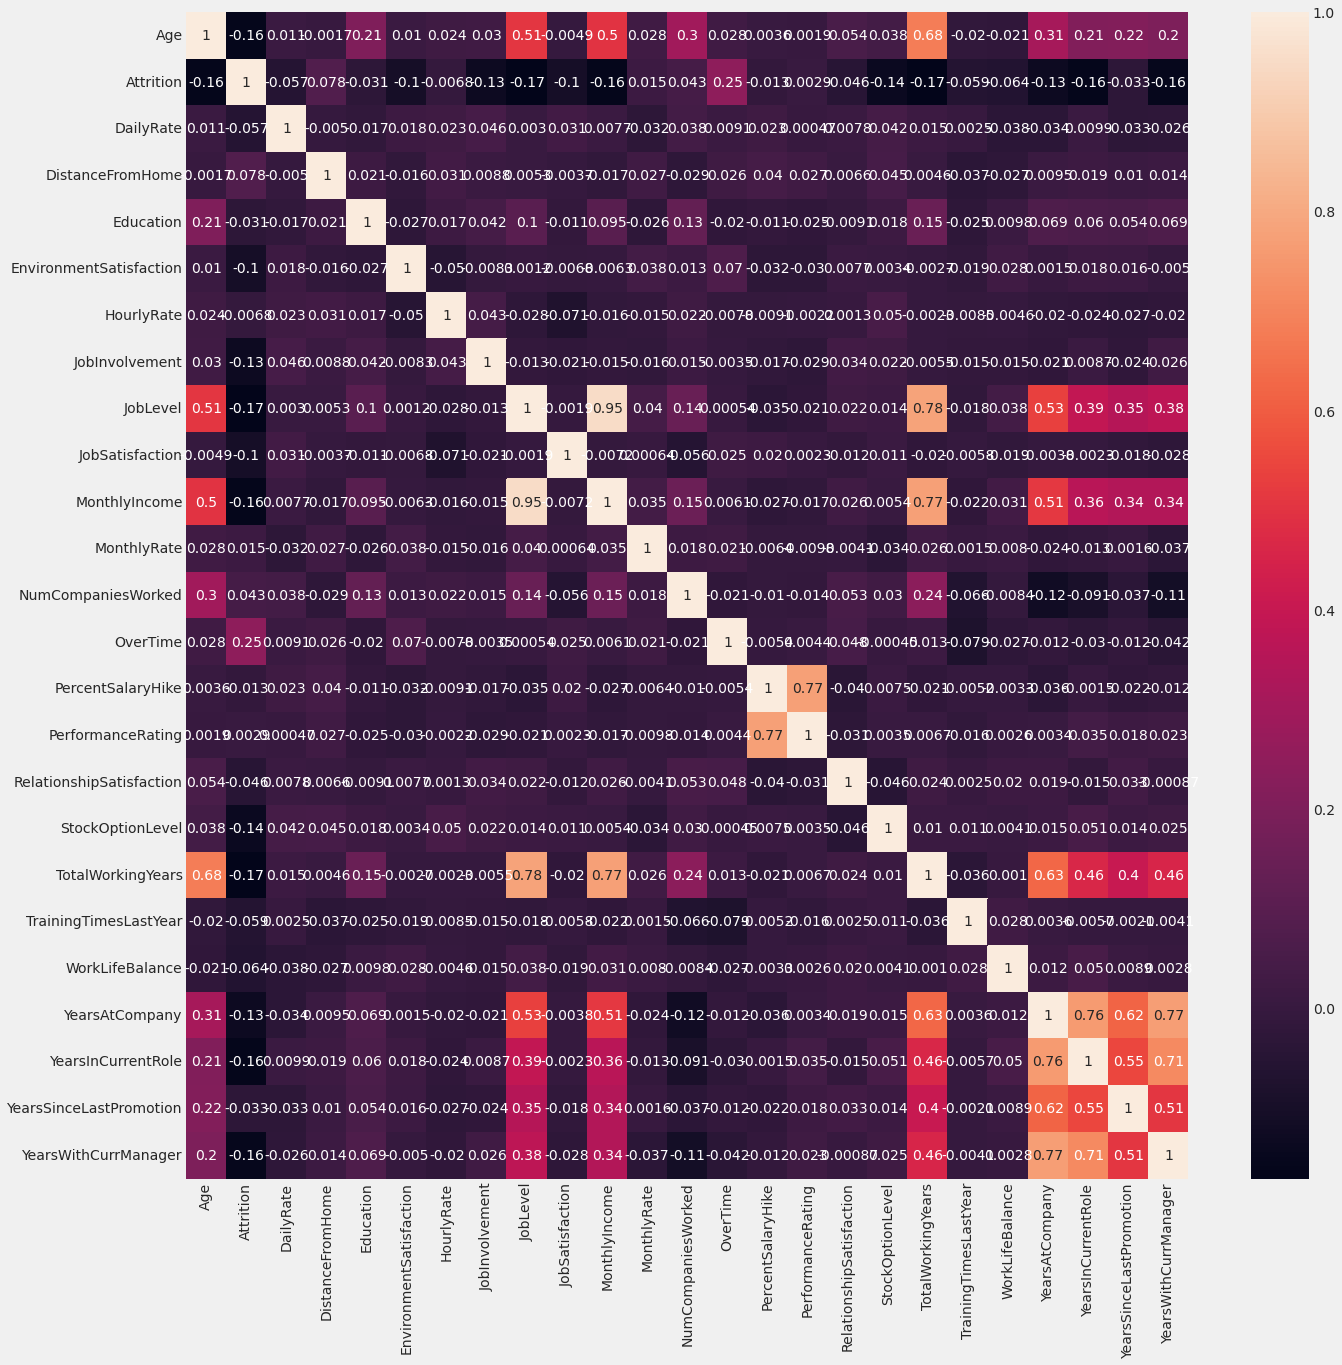

In [ ]:
#Check correlation between various attributes in the datatset
correlation = employee_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, annot = True)

In [ ]:
#employee_df.corr()
corr_matrix=employee_df.corr()

corr_matrix

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

In [ ]:
#Now let’s look at how much each attribute correlates 
#with the median house value

corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64

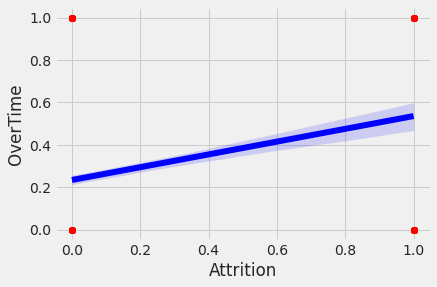

In [ ]:
sns.regplot(x='Attrition', y='OverTime', data=employee_df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

# The overtime hour has a slight correlation with attrition but no major conclusion can be drawn

In [ ]:
# Filter the highest correlation pairs and sort in descending order
stacked_df = employee_df.corr().stack().sort_values(ascending=False)
stacked_df[(stacked_df > 0.5) & (stacked_df < 1)]

JobLevel                 MonthlyIncome              0.950300
MonthlyIncome            JobLevel                   0.950300
JobLevel                 TotalWorkingYears          0.782208
TotalWorkingYears        JobLevel                   0.782208
PercentSalaryHike        PerformanceRating          0.773550
PerformanceRating        PercentSalaryHike          0.773550
MonthlyIncome            TotalWorkingYears          0.772893
TotalWorkingYears        MonthlyIncome              0.772893
YearsWithCurrManager     YearsAtCompany             0.769212
YearsAtCompany           YearsWithCurrManager       0.769212
                         YearsInCurrentRole         0.758754
YearsInCurrentRole       YearsAtCompany             0.758754
                         YearsWithCurrManager       0.714365
YearsWithCurrManager     YearsInCurrentRole         0.714365
TotalWorkingYears        Age                        0.680381
Age                      TotalWorkingYears          0.680381
TotalWorkingYears       

In [ ]:
corr_matrix["JobSatisfaction"].sort_values(ascending=False)

JobSatisfaction             1.000000
DailyRate                   0.030571
PercentSalaryHike           0.020002
StockOptionLevel            0.010690
PerformanceRating           0.002297
MonthlyRate                 0.000644
JobLevel                   -0.001944
YearsInCurrentRole         -0.002305
DistanceFromHome           -0.003669
YearsAtCompany             -0.003803
Age                        -0.004892
TrainingTimesLastYear      -0.005779
EnvironmentSatisfaction    -0.006784
MonthlyIncome              -0.007157
Education                  -0.011296
RelationshipSatisfaction   -0.012454
YearsSinceLastPromotion    -0.018214
WorkLifeBalance            -0.019459
TotalWorkingYears          -0.020185
JobInvolvement             -0.021476
YearsWithCurrManager       -0.027656
EmployeeNumber             -0.046247
NumCompaniesWorked         -0.055699
HourlyRate                 -0.071335
EmployeeCount                    NaN
StandardHours                    NaN
Name: JobSatisfaction, dtype: float64

In [ ]:
#OBSERVATIONS: 

# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


1. The above data shows that this is a relatively traditional company.

2. For example, the more the years of job experience, the higher the job level. They do not fill senior positions with people with fewer years of experience.

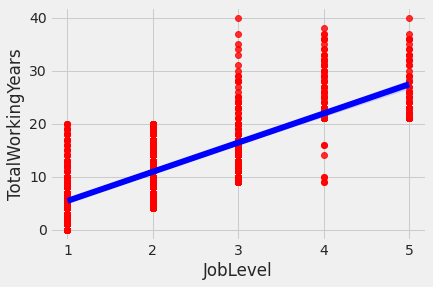

In [ ]:
# Scatter Plot
sns.regplot(x='JobLevel', y='TotalWorkingYears', data=employee_df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

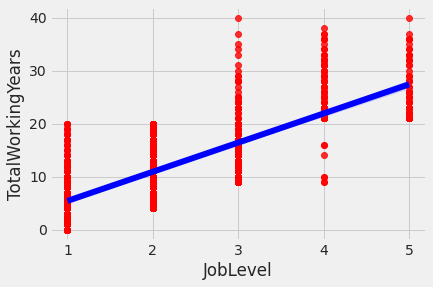

In [ ]:
# Scatter Plot
sns.regplot(x='JobLevel', y='MonthlyIncome', data=employee_df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

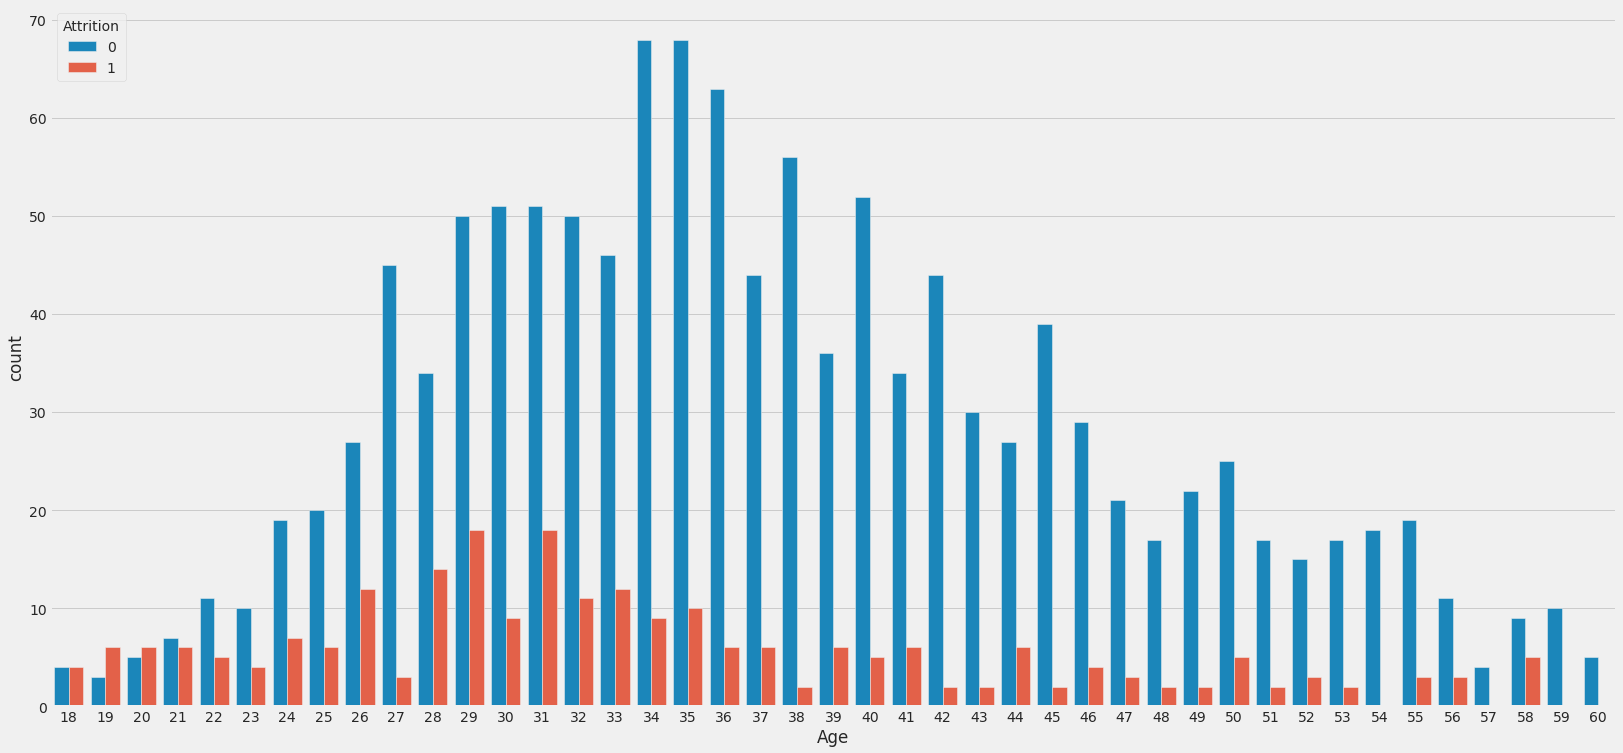

In [ ]:
plt.subplots(figsize = (25,12))
sns.countplot(x='Age', hue = 'Attrition', data = employee_df)

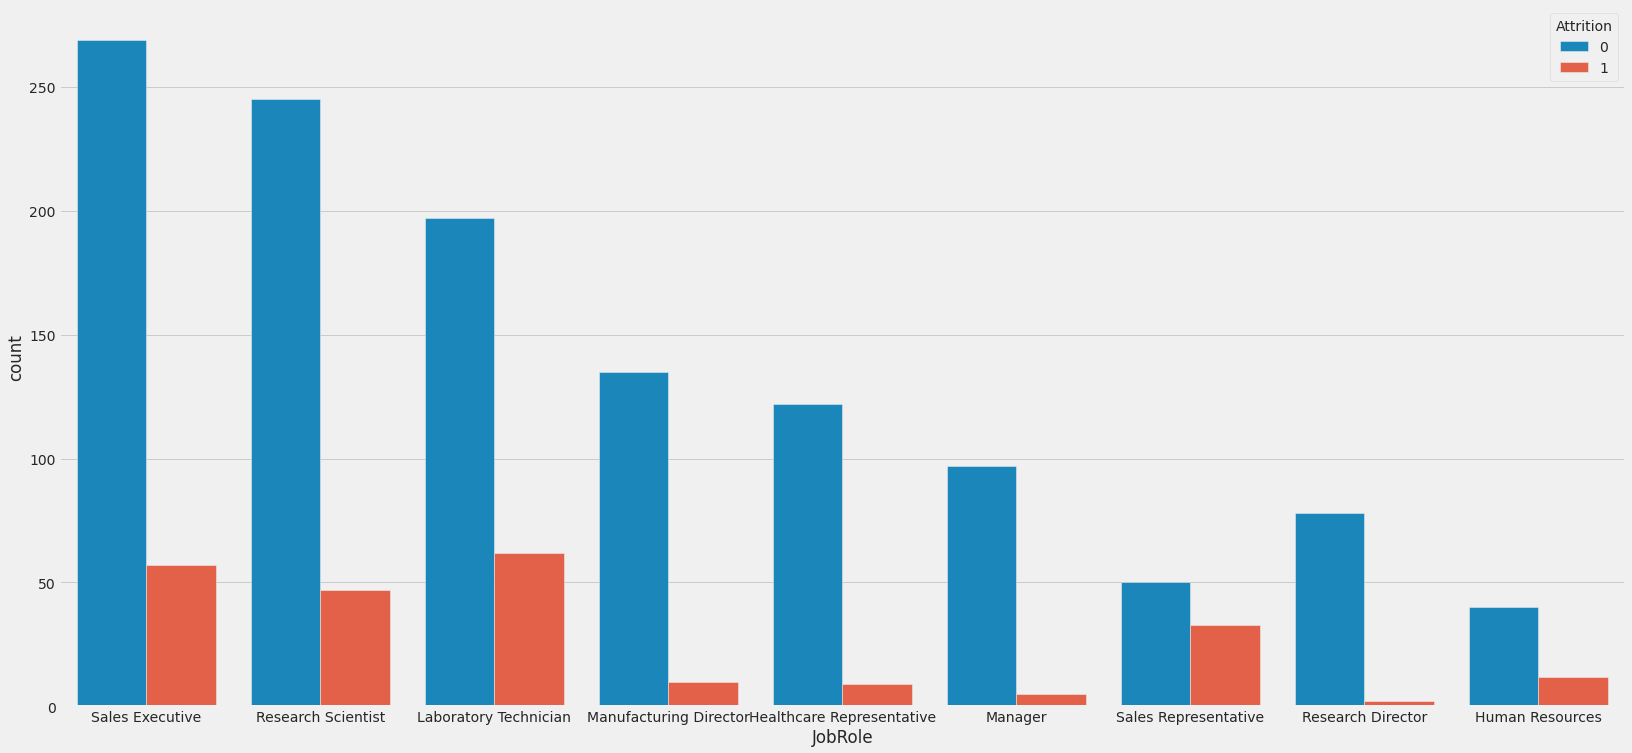

In [ ]:
plt.figure(figsize = (25,12))

sns.countplot(x='JobRole', hue = 'Attrition', data = employee_df)

#High turover at the sales Representative Role 
#Low turnover at the Research director position Role 

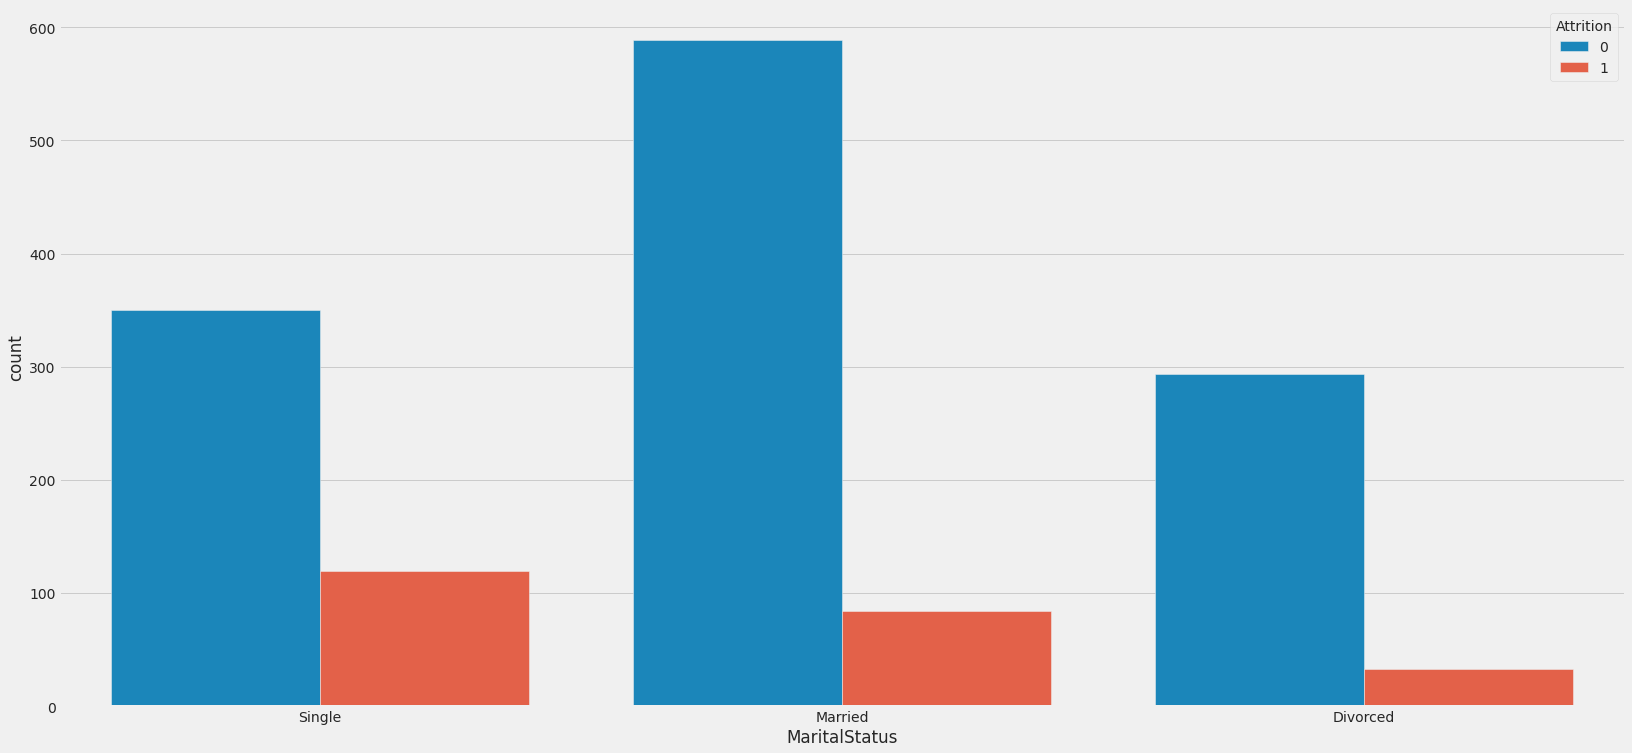

In [ ]:
plt.figure(figsize = (25,12))

sns.countplot(x='MaritalStatus', hue = 'Attrition', data = employee_df)

#Single (unmarried) have a higher tendency to leave and compared to both married and divorced



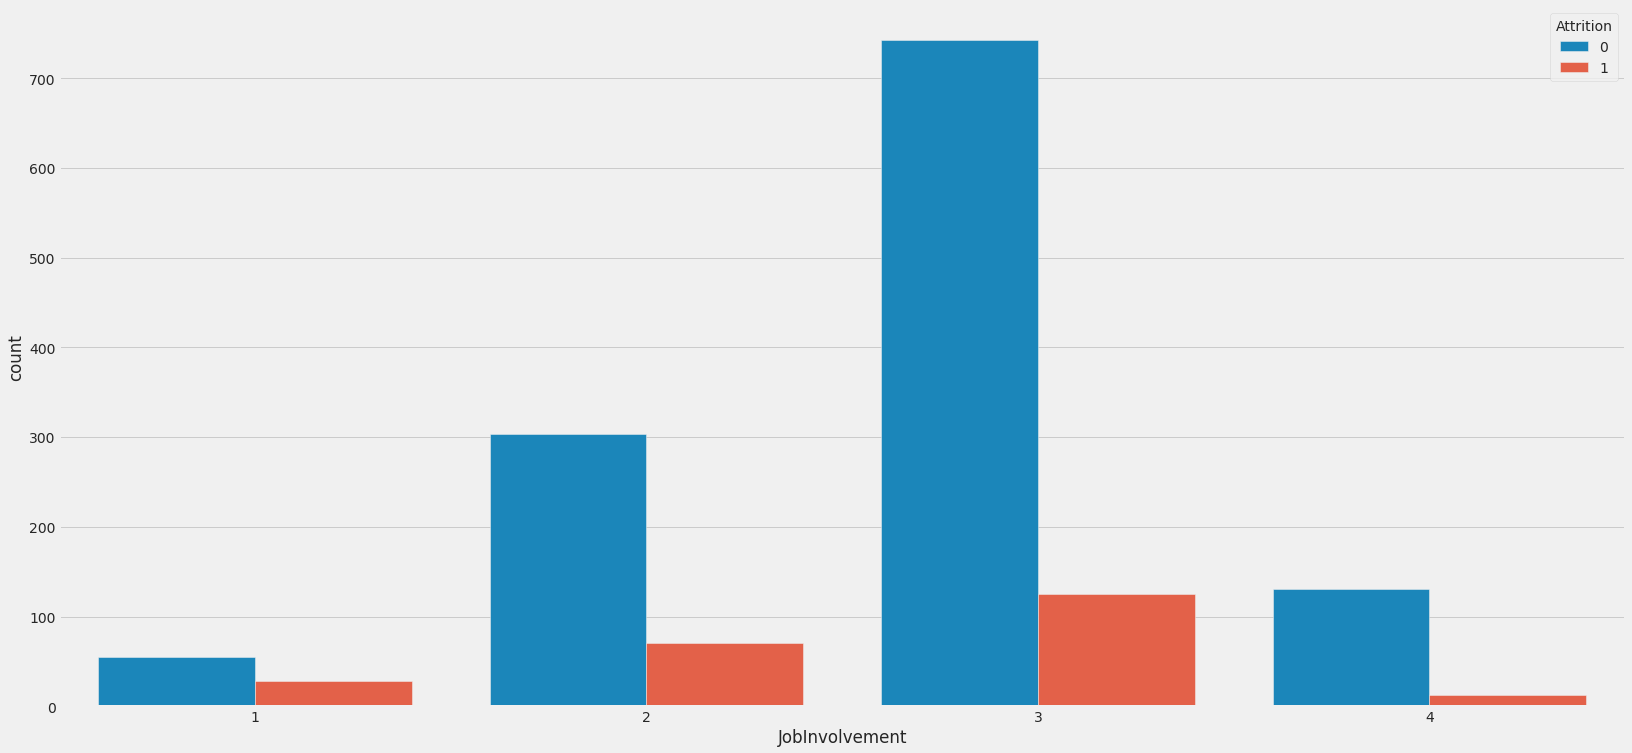

In [ ]:
plt.figure(figsize = (25,12))

sns.countplot(x='JobInvolvement', hue = 'Attrition', data = employee_df)

#Those with very low job involvement are likely to leave the company 

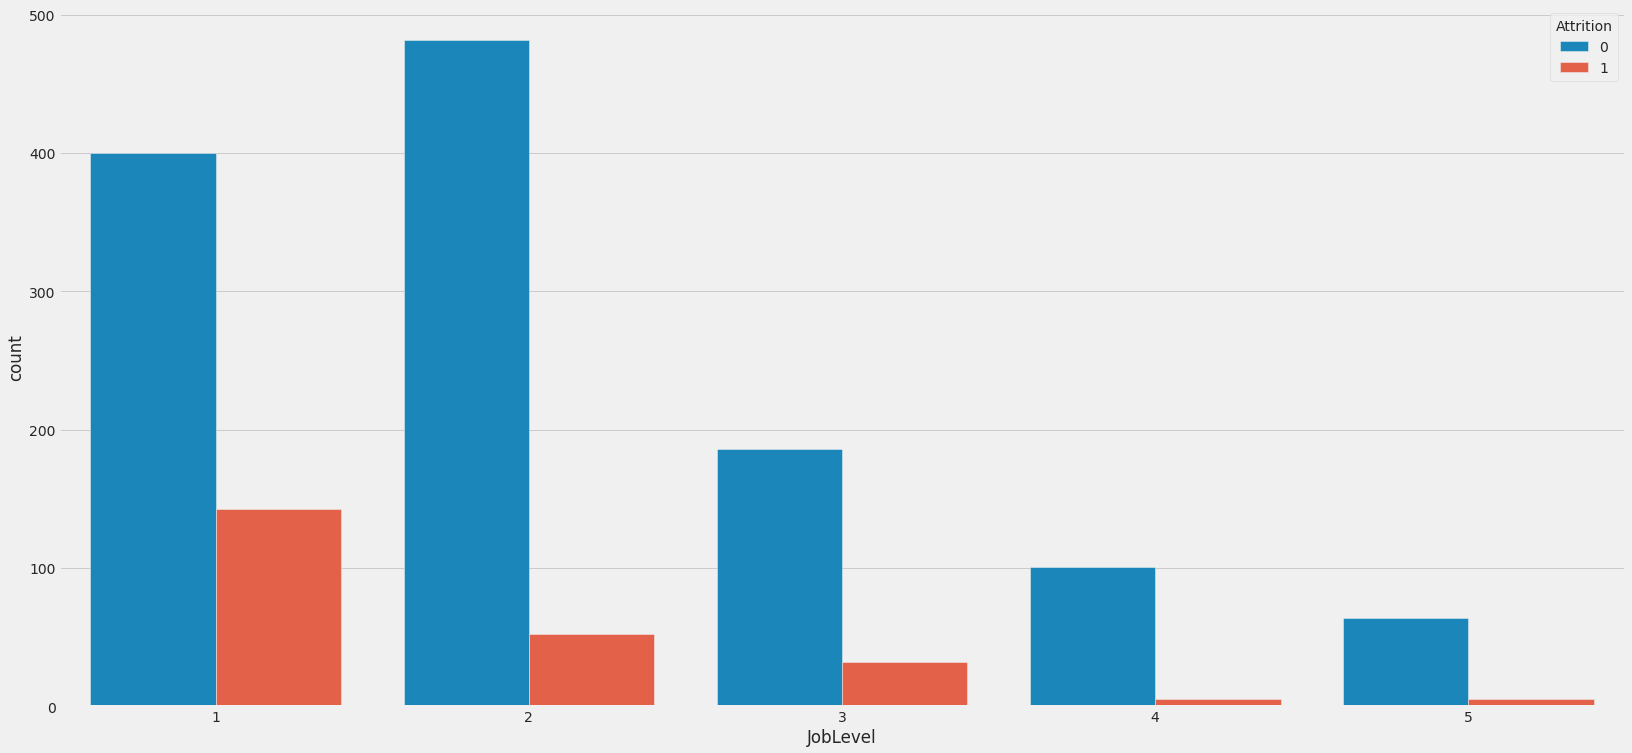

In [ ]:
plt.figure(figsize = (25,12))

sns.countplot(x='JobLevel', hue = 'Attrition', data = employee_df)

#As you become more experienced at the workplace, it is very difficult to leave
#Those who just started with their work are likely to leave  

In [ ]:
#SUMMARY OBSERVATION 

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

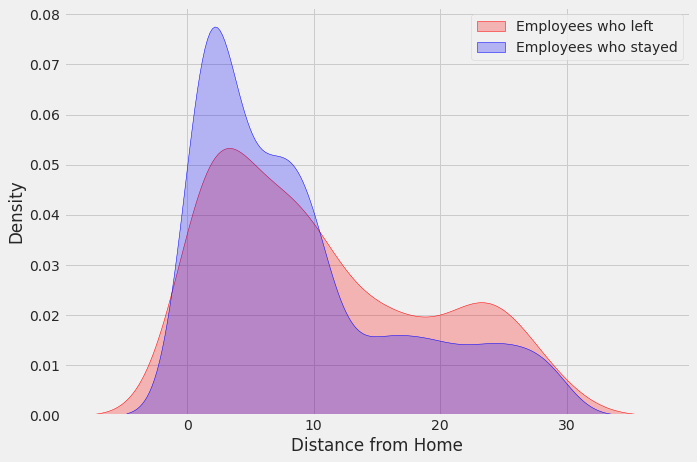

In [ ]:
#KDE (Kernel Density Estimate) is used for visualizing the probability Density of a continous variable. 
#KDE (Kernel Density Estimate) describes the probability density at different values in a continous variable 

plt.figure(figsize = (10,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who stayed', shade = True, color = 'b')

plt.xlabel('Distance from Home')
plt.legend()
plt.show()

More workers (about 78%) with shorter distances (less than 10) to their various homes tend to stay. 

The opposite is also true. Thus for worker who are far from the place of work (above 10) are likely to leave


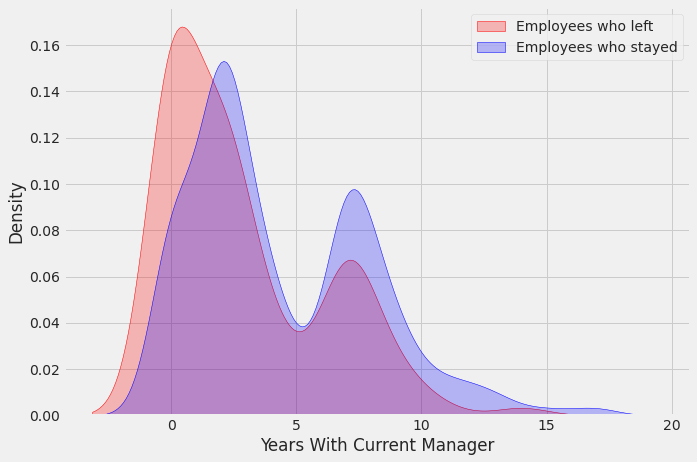

In [ ]:
plt.figure(figsize = (10,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')
plt.legend()
plt.show()

It can be observed that in the early years (0-5) of working with a new manager, worker are likely to leave. 

After a number of years (between 5 to 15) with a new manager, more workers tend to stay. 

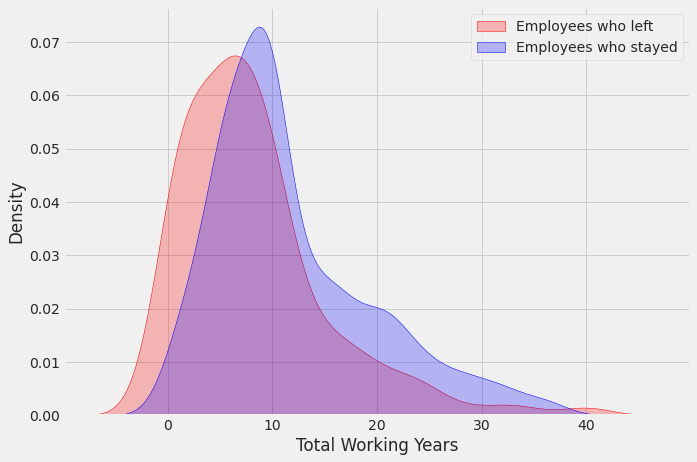

In [ ]:
plt.figure(figsize = (10,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stayed', shade = True, color = 'b')

plt.xlabel('Total Working Years')
plt.legend()
plt.show()

Workers in their early years (0-10 years) are likely to leave while after staying at the workplace for over 10 years they are not likely to want to leave. 

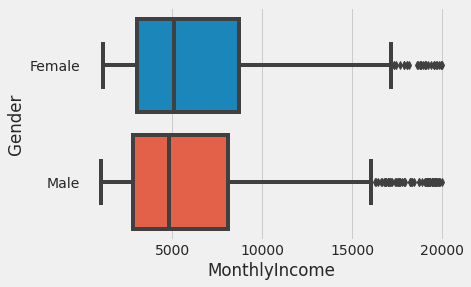

In [ ]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)

In [ ]:
# It can be observed that the median for both Male and Female are almost the same. 
# Females recieve more money above the maximum 
# But Male gender have more outliers 



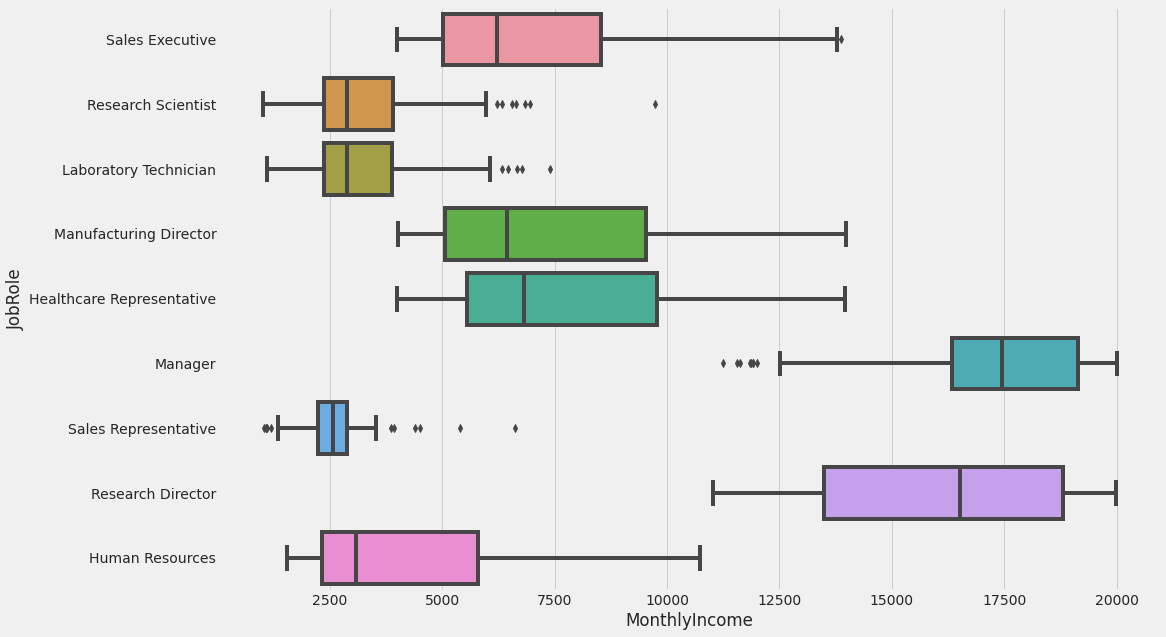

In [ ]:
# Let's see the JobRole vs. Monthly Income
plt.figure(figsize = (15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

As can be observed Manager and Reserach Director recived higher Monthly income on average. 

Research Scientist, Laboratory technician and Sales Representative have lower avearge salary. 

The Sales Representative recieve the lowest salary.  

OUTLIER ANALYSIS 

In [ ]:
# Position of the Outlier
#print(np.where(employee_df['MonthlyIncome']<20))

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [ ]:
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   
3                   1         1                 11                  3   
4                   9         0                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [ ]:
#select the categorical data only for further processing 
x_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

#print the first 5 rows 
x_cat.head()

BusinessTravel              Department EducationField  Gender  \
0      Travel_Rarely                   Sales  Life Sciences  Female   
1  Travel_Frequently  Research & Development  Life Sciences    Male   
2      Travel_Rarely  Research & Development          Other    Male   
3  Travel_Frequently  Research & Development  Life Sciences  Female   
4      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus  
0        Sales Executive        Single  
1     Research Scientist       Married  
2  Laboratory Technician        Single  
3     Research Scientist       Married  
4  Laboratory Technician       Married

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [ ]:
x_cat.shape , x_cat

((1470, 26), array([[0., 0., 1., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 0., 1.],
        ...,
        [0., 0., 1., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 1., 0.]]))

In [ ]:
x_cat = pd.DataFrame(x_cat)

In [ ]:
x_cat.shape

(1470, 26)

In [ ]:
#num_list = employee_df.select_dtypes(include=np.number).columns.tolist()

x_numerical =  employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

 # note that we dropped the target 'Atrittion'

In [ ]:
#Check the shape of the numerical data 

x_numerical.shape

(1470, 24)

In [ ]:
x_all = pd.concat([x_cat, x_numerical], axis = 1)
x_all

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
5     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
6     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
7     0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
8     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
9     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
10    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
11    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
12    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
13    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
14    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
15    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
16    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
17    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
18    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
19    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
20    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
21    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
22    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
23    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
24    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
25    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
26    0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
27    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
28    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
29    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
30    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
31    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
32    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
33    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
34    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
35    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
36    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
37    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
38    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
39    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
40    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
41    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
42    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
43    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
44    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
45    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
46    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
47    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
48    0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
49    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
50    0.0  0.0  1.0  0.0  1.0 

In [ ]:
#Find the shape of the final input data 

x_all.shape

(1470, 50)

In [ ]:
#Scale the data using minmaxscaler 
#ML algorithm works better when features are relatively on a similar scale and close to Normal Distribution.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(x_all)

#MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.
#Note that MinMaxScaler doesn’t reduce the importance of outliers.
#The default range for the feature returned by MinMaxScaler is 0 to 1.

#

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
#Show the final scaled version of the input data 
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
#set the target output which indicates if attition is yes (1) or No (0)
y = employee_df['Attrition']
#Print the first set rows
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS 

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1102, 50)
(368, 50)
(1102,)
(368,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#create a model 
#instantiate an object 

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 88.04347826086956 %


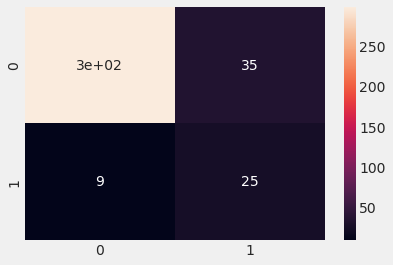

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [ ]:
Class_Report = classification_report(y_test, y_pred)
print(Class_Report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       308
           1       0.74      0.42      0.53        60

    accuracy                           0.88       368
   macro avg       0.82      0.69      0.73       368
weighted avg       0.87      0.88      0.87       368



# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#create a model 
#instantiate an object 

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:

#from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 85.59782608695652 %


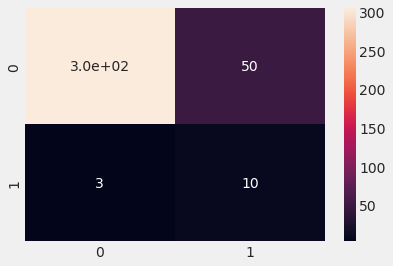

In [ ]:
# Testing Set Performance

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)


In [ ]:
Class_Report = classification_report(y_test, y_pred)
print(Class_Report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       308
           1       0.77      0.17      0.27        60

    accuracy                           0.86       368
   macro avg       0.81      0.58      0.60       368
weighted avg       0.84      0.86      0.81       368



# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL 

In [ ]:
import tensorflow as tf 

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (50, )))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu',))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu',))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid',))

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               25500     
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs =100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 2s 22ms/step - loss: 0.4438 - accuracy: 0.8167
Epoch 2/100
23/23 [==============================] - 0s 20ms/step - loss: 0.3568 - accuracy: 0.8512
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3204 - accuracy: 0.8829
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2854 - accuracy: 0.8984
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3173 - accuracy: 0.8757
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2447 - accuracy: 0.9002
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1917 - accuracy: 0.9301
Epoch 8/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1674 - accuracy: 0.9356
Epoch 9/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2012 - accuracy: 0.9229
Epoch 10/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1303 - accuracy: 0.9465
Epoch 

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

y_pred

12/12 [==============================] - 0s 5ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

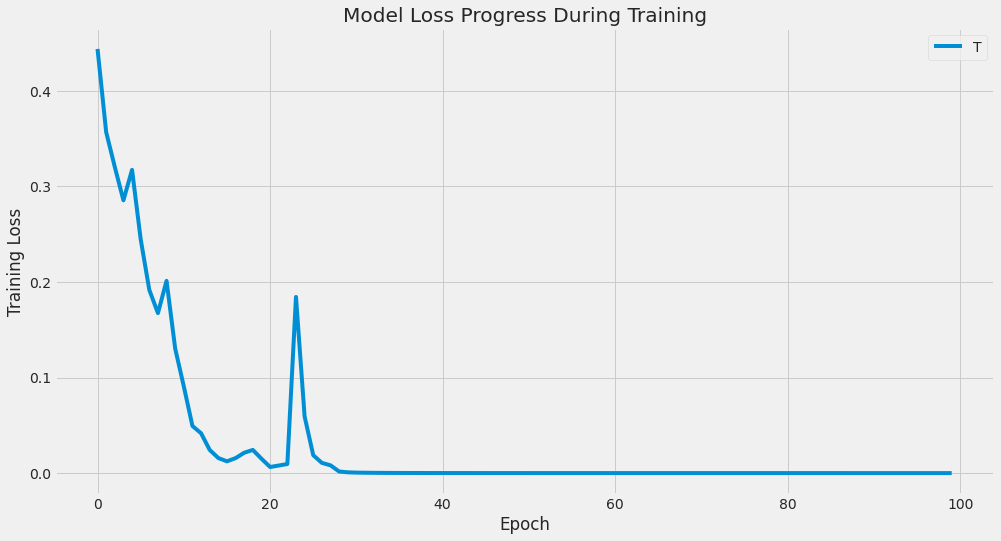

In [ ]:
plt.subplots(figsize = (15,8))

plt.plot(epochs_hist.history["loss"])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')

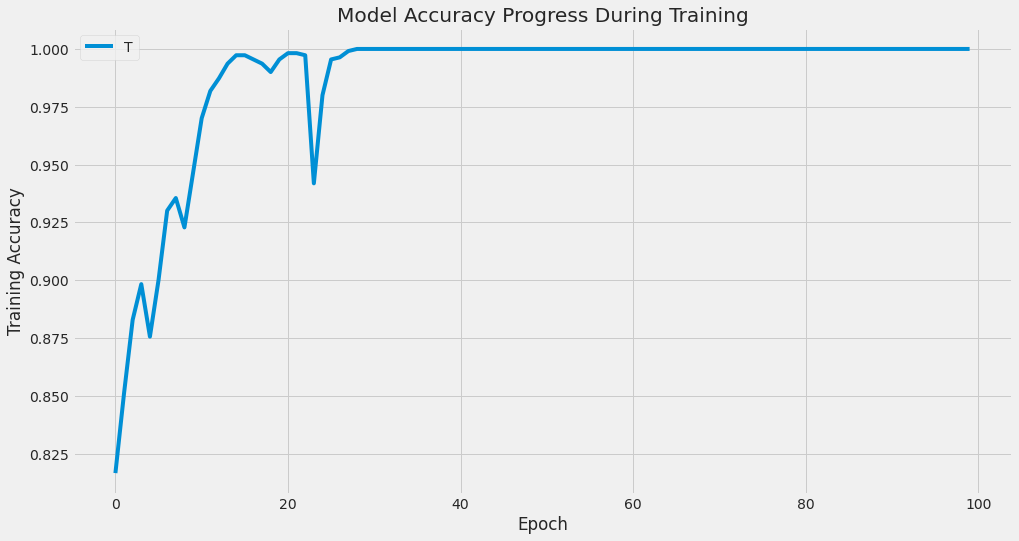

In [ ]:
plt.subplots(figsize = (15,8))

plt.plot(epochs_hist.history["accuracy"])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend('Training Accuracy')

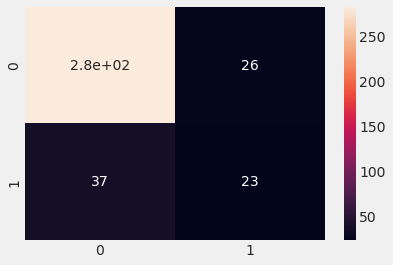

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

In [ ]:
Class_Report = classification_report(y_test, y_pred)
print(Class_Report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       308
           1       0.47      0.38      0.42        60

    accuracy                           0.83       368
   macro avg       0.68      0.65      0.66       368
weighted avg       0.82      0.83      0.82       368



### OUTLIER ANALYSIS 

Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range.let’s take an example to check what happens to a data set with and data set without outliers.

In [ ]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
    print("Number of Outliers:",len(out))

In [ ]:
num_outliers = iqr_outliers(employee_df['MonthlyIncome'])

Outliers: [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
Number of Outliers: 114


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


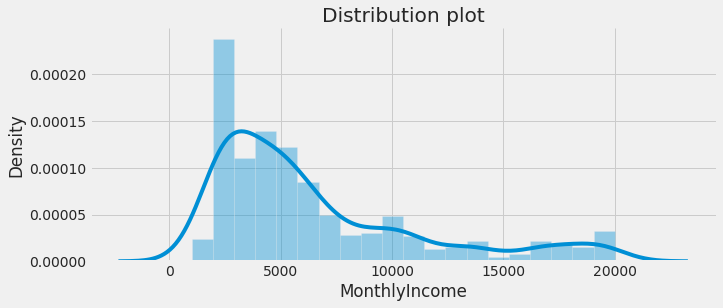

In [ ]:
    plt.figure(figsize=(10, 4))
    
    sns.distplot(employee_df['MonthlyIncome'])
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


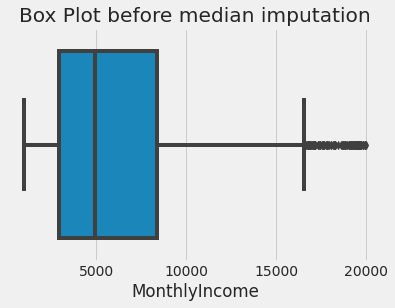

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


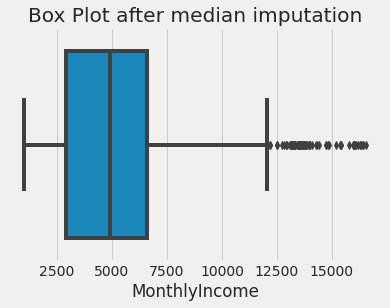

In [ ]:
sns.boxplot(employee_df['MonthlyIncome'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = employee_df['MonthlyIncome'].quantile(0.25)
q3 = employee_df['MonthlyIncome'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(employee_df['MonthlyIncome'])
for i in employee_df['MonthlyIncome']:
    if i > Upper_tail or i < Lower_tail:
            employee_df['MonthlyIncome'] = employee_df['MonthlyIncome'].replace(i, med)
sns.boxplot(employee_df['MonthlyIncome'])
plt.title("Box Plot after median imputation")
plt.show() 

In [ ]:
column = employee_df['MonthlyIncome']
def get_num_outliers (column):
 q1 = np.percentile(column, 25)
 q3 = np.percentile(column, 75)
 return sum((column<q1) | (column>q3))

 

In [ ]:
employee_df.groupby(employee_df['Gender']).agg([get_num_outliers])

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


Age        Attrition        DailyRate DistanceFromHome  \
       get_num_outliers get_num_outliers get_num_outliers get_num_outliers   
Gender                                                                       
Female              284               87              292              227   
Male                423              150              441              336   

              Education EnvironmentSatisfaction       HourlyRate  \
       get_num_outliers        get_num_outliers get_num_outliers   
Gender                                                             
Female               82                     113              287   
Male                136                     171              411   

         JobInvolvement         JobLevel  JobSatisfaction    MonthlyIncome  \
       get_num_outliers get_num_outliers get_num_outliers get_num_outliers   
Gender                                                                       
Female               84               75              119              294   
Male                143              100              170              442   

            MonthlyRate NumCompaniesWorked         OverTime PercentSalaryHike  \
       get_num_outliers   get_num_outliers get_num_outliers  get_num_outliers   
Gender                                                                          
Female              294                204                0               221   
Male                442                301                0               291   

       PerformanceRating RelationshipSatisfaction StockOptionLevel  \
        get_num_outliers         get_num_outliers get_num_outliers   
Gender                                                               
Female                94                      118               92   
Male                 132                      158              151   

       TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
        get_num_outliers      get_num_outliers get_num_outliers   
Gender                                                            
Female               261                   178               87   
Male                 420                   254              146   

         YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion  \
       get_num_outliers   get_num_outliers        get_num_outliers   
Gender                                                               
Female              236                217                     141   
Male                436                347                     208   

       YearsWithCurrManager  
           get_num_outliers  
Gender                       
Female                  244  
Male                    366